In [1]:
# Decision trere ID3 uses information gain

# Entropy is the randomness or measuring the disorder of the information being processed in Machine Learning
# The reduction in entropy or surprise by transforming a dataset and is often used in training decision trees

In [2]:
# Importing the packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = [30,15]

In [3]:
# Importing the dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop('Id',axis=1,inplace=True)

In [5]:
# Selecting the feature columns(X) & target column(y)
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# Creating a simple Decision Tree Classifier on entropy
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=3) 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Accuracy: {:.2f}'.format(dtc.score(X_test, y_test)))

Accuracy: 0.98


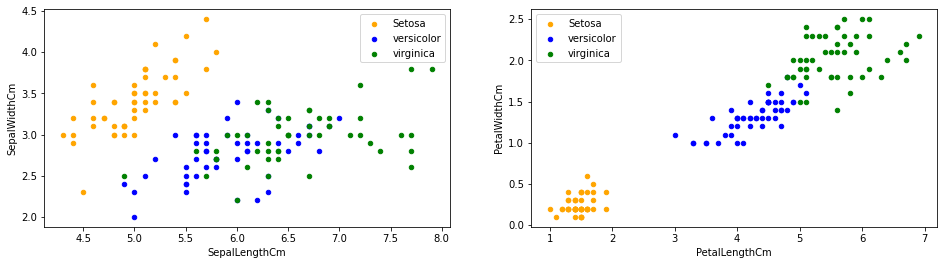

In [7]:
# Plotting the data
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa', ax = ax1)
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=ax1)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax1)

df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa', ax = ax2)
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=ax2)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=ax2)

plt.show()

In [8]:
# Example of the output using input
dtc.predict([[1,1, 5, 1.5]])

/Users/prabhatm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [9]:
# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



[Text(0.375, 0.875, 'X[3] <= 0.75\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.95\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.25, 0.375, 'X[3] <= 1.65\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'X[3] <= 1.75\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

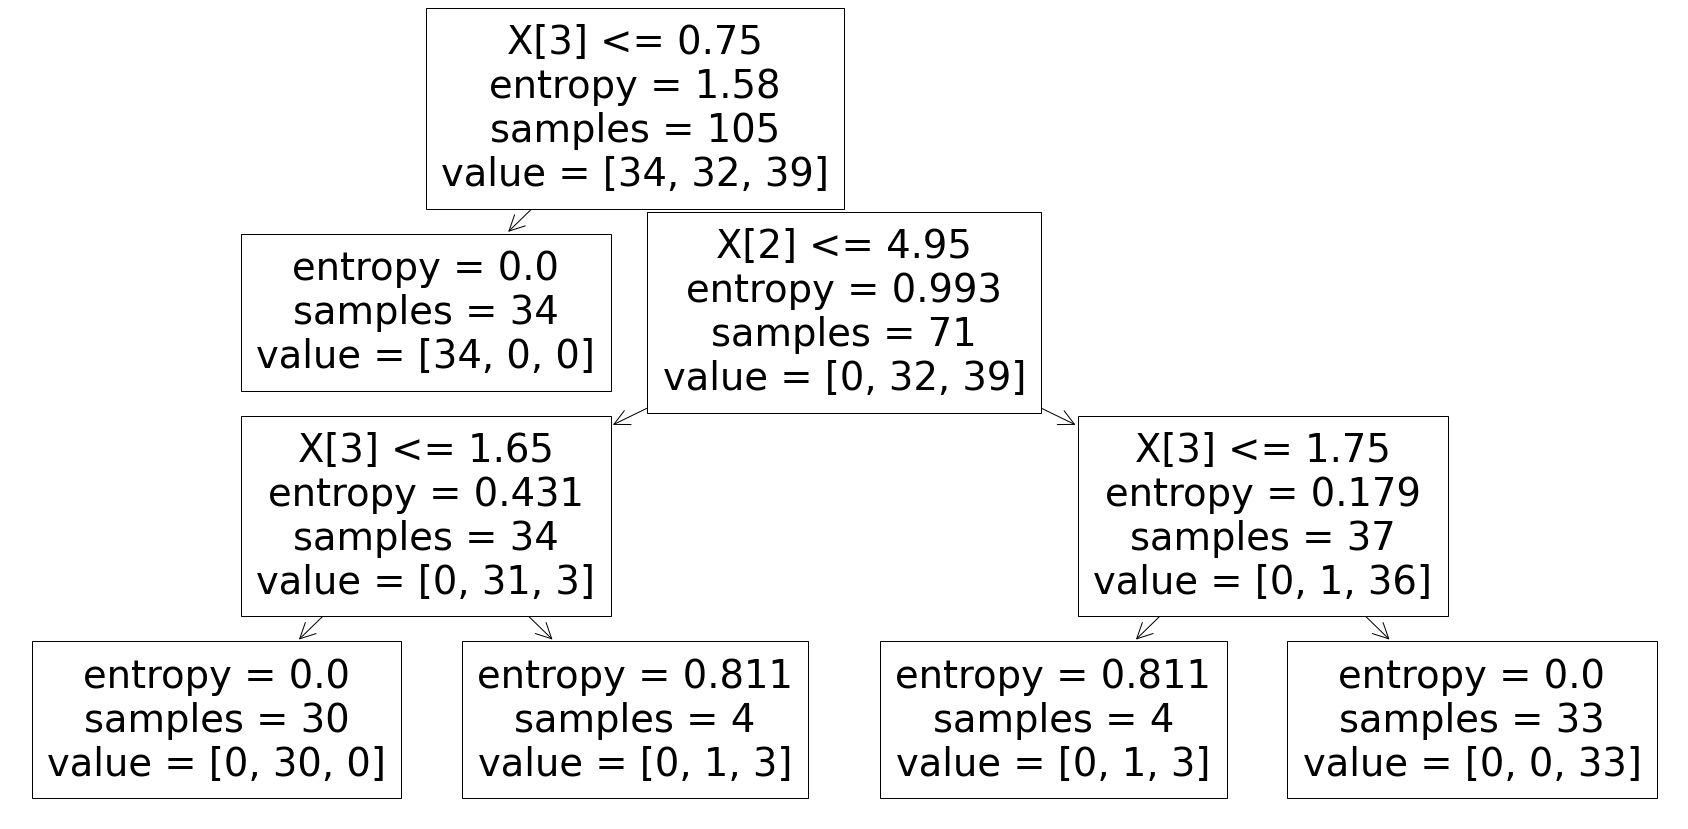

In [10]:
# Plotting the Decision Tree Classifier
tree.plot_tree(dtc)